# Linear Algebra 

## Vectors

In [2147]:
import numpy as np
import math 
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

A vector is a mathematical object that has both magnitude (length) and direction. It is typically represented as an ordered list of numbers (coordinates) in a particular space (e.g., 2D or 3D space). Vectors are often used to represent quantities like velocity, force, or displacement in physics, where both the size and direction matter.

Key Properties:
- Magnitude: The length or size of the vector.
- Direction: The way the vector is oriented in space.
- Components: The individual numbers that describe the vector in terms of a coordinate system.

let's start by making two 3-dimensional vectors:

In [2148]:
a = np.random.randint(0,10,(3,))
b = np.random.randint(0,10,(3,))
print(f"the vector a:{a}, and b:{b}")

the vector a:[5 9 8], and b:[9 0 6]


these three numbers of each vector represent the coordinates **x, y** and **z** in 3-dimensional space, like:
$$[\;n_1,\; n_2,\; n_3\;] = [\;x,\; y,\; z\;]$$

we'll call them the vectors **A** and **B**

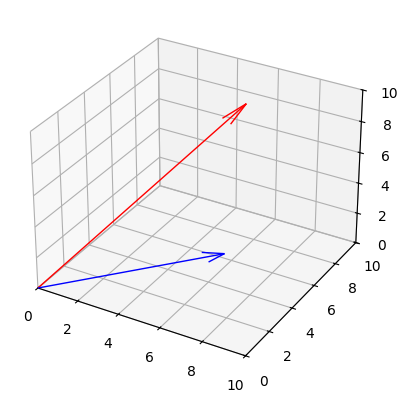

In [2149]:
fig = plt.figure()

X = np.linspace(-5, 5, 100)
Y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(X, Y)

ax = plt.axes(projection='3d')

origin = np.zeros(3)

ax.quiver(*origin, *a, color='red', label="a", arrow_length_ratio=0.1,linewidth=1)
ax.quiver(*origin, *b, color='blue', label="b", arrow_length_ratio=0.1,linewidth=1)

ax.set_xlim([0, 10])  
ax.set_ylim([0, 10])  
ax.set_zlim([0, 10]) 

plt.show()

### Magnitude of a vector

with these vectors we can calculate some cool stuff, firstly we can find the magnitude of them

to calculate the magnitude $\| \mathbf{v}\|$ (this is the notation) of the vector $\mathbf{v}$ in $R^{n}$ we use the following method:
$$\| v \|=\sqrt{(v_1)^2+(v_2)^2+(v_3)^2+\cdots+(v_n)^2}$$
lets implement a function in python:

In [2150]:
def norm(x):
    return math.sqrt(sum([a**2 for a in x]))


now call it for **a** and **b**:

In [2151]:
norm_a = norm(a)
norm_b = norm(b)
print(f"magnitude of a: {round(norm_a, 4)}, and b: {round(norm_b, 4)}")

magnitude of a: 13.0384, and b: 10.8167


### Normalizing 

This formula gives us the magnitude (or length) of the vector. 

one of the many cool things we can do with the magnitude is using it in the process of normalizing a vector results in its corresponding **unit vector**.
Unit vectors have a magnitude of *1* and are used primarily to specify direction, independent of the vector’s original magnitude. They are especially useful in fields like physics and mathematics to represent directions in space.

to normalize we use just divide each element of the vector $\mathbf{v}$ by the **magnitude**:
$$\frac{1}{\| \mathbf{v}\|} \cdot \mathbf{v}

### Unit Vectors

let's make a function to normalize the vectors:

In [2152]:
def normalize(vec, mag):
    return vec/mag

In [2153]:
a_n = normalize(a, norm_a)
b_n = normalize(b, norm_b)
print(f"the unitary vector for a is: {a_n}, and for b: {b_n}")

the unitary vector for a is: [0.38348249 0.69026849 0.61357199], and for b: [0.83205029 0.         0.5547002 ]


now we can plot the normalized vectors (i reduced the scale for better visualization):

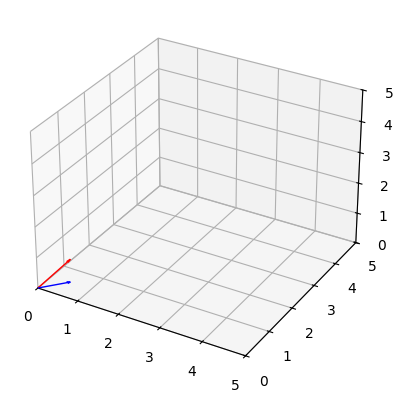

In [2154]:
fig = plt.figure()

X = np.linspace(-5, 5, 100)
Y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(X, Y)

ax = plt.axes(projection='3d')

origin = np.zeros(3)

ax.quiver(*origin, *a_n, color='red', label="a", arrow_length_ratio=0.1,linewidth=1)
ax.quiver(*origin, *b_n, color='blue', label="b", arrow_length_ratio=0.1,linewidth=1)

ax.set_xlim([0, 5])  
ax.set_ylim([0, 5])  
ax.set_zlim([0, 5]) 

plt.show()

In [2155]:
norm_normalized_a = norm(a_n)
norm_normalized_b = norm(b_n)
print(f"magnitude of a: {round(norm_normalized_a, 4)}, and b: {round(norm_normalized_b, 4)}")

magnitude of a: 1.0, and b: 1.0


we could use these normalized vectors as a combination to remake the original vector using scalars (scalars meaning a number we multiply the vectors by).

In the $\real^n$ space we have unit vectors of:
$$(1,0,0,\cdots,n),\; (0,1,0,\cdots,n),\; (0,0,1,\cdots,n),\;\cdots,\;(0,0,0,\cdots,1)$$ 

### Distance

in a similar way to the **magnitude** formula we can also calculate the **distance** $\overrightarrow{UV}$ or $d(u,v)$ between two vectors. Per example the vectors  **u** and **v**:
$$d(u,v)=\sqrt{(u_1 - v_1)^2+(u_2 - v_2)^2+(u_3 - v_3)^2+\cdots+(u_n - v_n)^2}
$$
let's implement this function:

In [2156]:
def distance(a, b):
    return math.sqrt(sum([(u - v)**2 for u,v in zip(a,b)]))

using or original **a** and **b**, the distance between them is:

In [2157]:
distance = distance(a, b)
print(f"total distance of: {distance}")

total distance of: 10.04987562112089


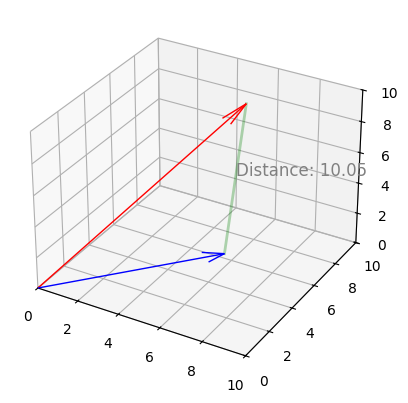

In [2158]:
fig = plt.figure()

X = np.linspace(-5, 5, 100)
Y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(X, Y)

ax = plt.axes(projection='3d')

origin = np.zeros(3)

ax.quiver(*origin, *a, color='red', label="a", arrow_length_ratio=0.1,linewidth=1)
ax.quiver(*origin, *b, color='blue', label="b", arrow_length_ratio=0.1,linewidth=1)

#the new line to show distance
ax.plot([a[0], b[0]], [a[1], b[1]], [a[2], b[2]], color='green', label='Distance', linewidth=2, alpha=0.3)

#the text for distance
midpoint = (a + b) / 2  
ax.text(midpoint[0], midpoint[1], midpoint[2], f'Distance: {distance:.2f}', color='gray', fontsize=12)

ax.set_xlim([0, 10])  
ax.set_ylim([0, 10])  
ax.set_zlim([0, 10]) 

plt.show()

### Dot Product

Another cool and important thing we can do with the magnitude of a vector is find the dot product.

The dot product (also known as the scalar product) is a fundamental operation between two vectors that results in a scalar. It’s used to measure the degree of similarity between two vectors, and it has many important applications in physics, computer graphics, and machine learning, among others.

For example, we can calculate it using the vectors **u** and **v**:

$$
\mathbf{u} \cdot \mathbf{v} = \|\mathbf{u}\| \|\mathbf{v}\| \cos(\theta)
$$
We can also find a per-component formula based on the law of the cossines, i'll not show the process in here:
$$
\
\mathbf{u} \cdot \mathbf{v} = u_1 v_1 + u_2 v_2 + u_3 v_3 + \cdots + u_n v_n
$$

This is the per-component formula for the dot product, where each pair of corresponding components from the vectors u and v is multiplied and summed.


- Let's add this to a function:

In [2159]:
def dot(a, b):
    dot_p=0
    for u, v in zip(a, b):
        dot_p+=u*v

    return dot_p


and now call it for vectors **a** and **b**:

In [2160]:
print(f"the scalar that represents the relation between the vectors a and b is: {dot(a, b)}")

the scalar that represents the relation between the vectors a and b is: 93


The cool thing about the dot product is that, if we have vectors completely **ortagonal** (different directions, 90 degrees angle between them) to one another, they will have no relation, so the dot product will be 0:

In [2161]:
orto_a = np.array([1,0,0])
orto_b = np.array([0,1,0])
print(f"the scalar that represents the relation between the vectors a and b is: {dot(orto_a, orto_b)}")

the scalar that represents the relation between the vectors a and b is: 0


We can now use this to calculate the angle between the vectors (just use the formula, divide both sides by the magnitude and then multiply the arcsin).
let's implement:


In [2162]:
def vec_angle_rad(dot_a_b, a_norm, b_norm):
    cos_angle = dot_a_b / (a_norm * b_norm)
    cos_angle = max(-1, min(1, cos_angle)) 
    return math.acos(cos_angle)

and finally find the angle between **a** and **b**

In [2163]:
ang_a_b = vec_angle_rad(dot(a, b), norm_a, norm_b)
print(f"the angle between the vectors a and b is: {ang_a_b * (180/math.pi)} degrees")

the angle between the vectors a and b is: 48.74394800324359 degrees


### Representing Lines and Planes Using Points and Normals

In $\mathbb{R}^2$, a line can be defined by its inclination and a point through which it passes. Similarly, in $\mathbb{R}^3$, a plane is determined by its inclination and a point lying on it.

A common way to describe these inclinations is by using a nonzero vector known as the normal vector, which is perpendicular to the line in $\mathbb{R}^2$ or to the plane in $\mathbb{R}^3$.

one example is, the line that goes from $P_0(x_0, y_0)$ and normal $\mathbb{n}=(a,b)$

$$
\mathbb{n} \cdot \overrightarrow{P_0P} = 0
$$
$P$ is an arbitrary point in the line $(x,y)$
so,$\overrightarrow{P_0P}$ can be represented as the distance between the two:
$$
\overrightarrow{P_0P} = (x - x_0, y -y_0)
$$
then the **point-normal** equation can be made:
$$
\mathbb{n} \cdot \overrightarrow{P_0P} = 0
\\[10px]
a(x - x_0) + b(y - y_0) = 0
$$
the same idea generalizes for planes, resulting in
$$   
a(x - x_0) + b(y - y_0) + c(z-z_0) = 0
$$

This equation describes the relationship that must hold for any point $P(x, y, z)$ that lies on the plane. If the relation equals zero, then the point $P$ lies on the plane.

did a small plot below, the space did not have the Z so i inverted the formula above to find for it:

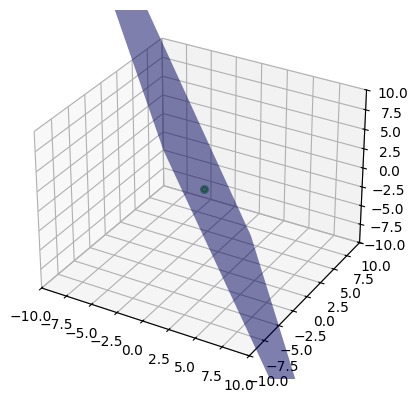

In [2247]:
fig = plt.figure()

X = np.linspace(-10, 10, 100)
Y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(X, Y)

ax = plt.axes(projection='3d')

origin = np.zeros(3)
normal_vector = np.random.randint(-10, 10, 3)
if normal_vector[2] ==0: normal_vector[2] =1
point = [0,0,0]
n_x, n_y, n_z = normal_vector
x_0, y_0, z_0 = point

Z = (n_x * (X - x_0) + n_y * (Y - y_0)) / n_z + z_0
ax.scatter(*point, color='green', label='Point', linewidth=2, alpha=0.5)
ax.plot_surface(X, Y, Z, color='blue', alpha=0.5, rstride=100, cstride=100)

ax.set_xlim([-10, 10])  
ax.set_ylim([-10, 10])  
ax.set_zlim([-10, 10]) 

plt.show()